(odes-exercises-section)=

# ODEs Exercises

`````{exercise}
:label: ch1-ex1

An IVP is given by 

\begin{align*}
    y' + y = 1 - e^{-t}  \qquad t\in [0,4], \qquad y(0) = 1.
\end{align*}


(a) &emsp; Using Python or MATLAB, compute the solution to the IVP using the Euler method with a step length of $h = 0.4$. Produce a plot of the solution $y(t)$ against $t$ and the exact solution which is $y = 1 - te^{-t}$ on the same set of axes.

````{dropdown} Solution
```{glue:figure} ex1.1a_plot
```
````

(b) &emsp; Compute the solution to this IVP using step lengths of $h = 0.4, 0.2, 0.1, 0.05$. Produce a plot of the four numerical solutions and the exact solution on the same axes.

````{dropdown} Solution
```{glue:figure} ex1.1b_plot
```
````

(c) &emsp; Calculate the global truncation errors for the four solutions at $t = 2$. Present your results in the form of a table with columns for the value of $h$, the numerical solution for $y(2)$ and the global truncation error $E$. 

Hint: you can use the NumPy command `idx = np.argmin(abs(t - 2))` or the MATLAB command `[~,idx] = min(abs(t - 2))` to determine the index of the value in the array `t` which is closest to 2.

````{dropdown} Solution
```
|  h   |  Euler   |   GTE    |
|------|----------|----------|
| 0.40 | 0.672496 | 5.68e-02 |
| 0.20 | 0.701442 | 2.79e-02 |
| 0.10 | 0.715579 | 1.38e-02 |
| 0.05 | 0.722507 | 6.82e-03 |
```
````

(d) &emsp; Produce plot of the global truncation errors $E$ against the step length $h$.

````{dropdown} Solution
```{glue:figure} ex1.1d_plot
```
````

`````

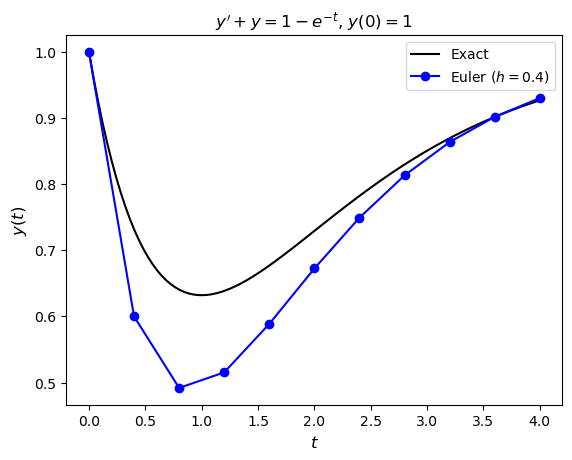

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):
    
    N = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((N, nsteps + 1))
        
    t[0] = tspan[0]
    y[:,0] = y0
    
    for n in range(nsteps):
        y[:,n+1] = y[:,n] + h * f(t[n], y[:,n])
        t[n+1] = t[n] + h

    return t, y.T


# Define ODE function
def f(t, y):
    return 1 - np.exp(-t) - y


# Define exact solution
def exact(t):
    return 1 - t * np.exp(-t)


# Define IVP parameters
tspan = [0, 4]  # boundaries of the t domain
y0 = [1]        # initial values
h = 0.4         # step length

# Solve the IVP using the Euler method
t, y = euler(f, tspan, y0, h)

# Calculate exact solution
t_exact = np.linspace(tspan[0], tspan[1], 100)
y_exact = exact(t_exact)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y[:,0], "b-o", label="Euler ($h = 0.4$)")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.title("$y' + y = 1 - e^{-t}$, $y(0) = 1$")
plt.legend()
plt.show()

from myst_nb import glue
glue("ex1.1a_plot", fig, display=False)

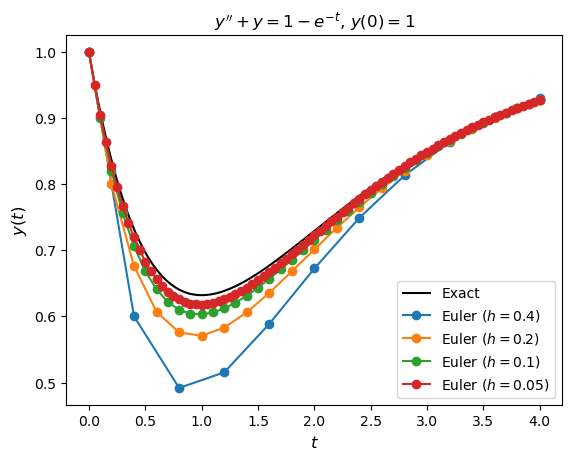

In [2]:
# Plot solution
fig, ax = plt.subplots()
plt.plot(t_exact, y_exact, "k", label="Exact")

hvals = [0.4, 0.2, 0.1, 0.05]
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    plt.plot(t, y, "-o", label=f"Euler ($h = {h}$)")

plt.xlabel("$t$", fontsize=12)
plt.ylabel("$y(t)$", fontsize=12)
plt.title("$y'' + y = 1 - e^{-t}$, $y(0) = 1$")
plt.legend()
plt.show()

glue("ex1.1b_plot", fig, display=False)

In [3]:
E = []
print("|  h   |  Euler   |   GTE    |")
print("|------|----------|----------|")
for h in hvals:
    t, y = euler(f, tspan, y0, h)
    idx = np.argmin(abs(t - 2))
    E.append(abs(exact(2) - y[idx,0]))
    print(f"| {h:0.2f} | {y[idx,0]:0.6} | {E[-1]:0.2e} |")

|  h   |  Euler   |   GTE    |
|------|----------|----------|
| 0.40 | 0.672496 | 5.68e-02 |
| 0.20 | 0.701442 | 2.79e-02 |
| 0.10 | 0.715579 | 1.38e-02 |
| 0.05 | 0.722507 | 6.82e-03 |


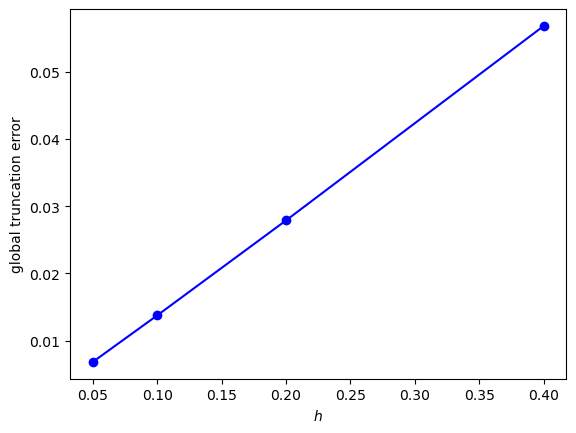

In [4]:
# Plot solution
fig, ax = plt.subplots()
plt.plot(hvals, E, "bo-")
plt.xlabel('$h$')
plt.ylabel('global truncation error')

glue("ex1.1d_plot", fig, display=False)

`````{exercise}
:label: ch1-ex2

The motion of a pendulum can be modelled by the following ODE

$$ \begin{align*}
    \ddot{\theta} + \frac{g}{L} \sin(\theta) = 0,
\end{align*} $$

where $\theta$ is the angle between the pendulum and the vertical, $L$ is the length of the pendulum and $g=9.81\text{ms}^{-2}$ is the acceleration due to gravity.

```{figure} /_images/pendulum.svg
:width: 150
```

A pendulum of length 1 m is intially set so that the angle between the chord and the vertical is $\dfrac{\pi}{2}$. Use the Euler method with a step length of $h = 0.001$ to model the first 10 seconds of the motion of the pendulum. Produce a plot of the displacement angle $\theta$ against $t$.

````{dropdown} Solution
```{glue:figure} ex1.2_plot
```
````

`````

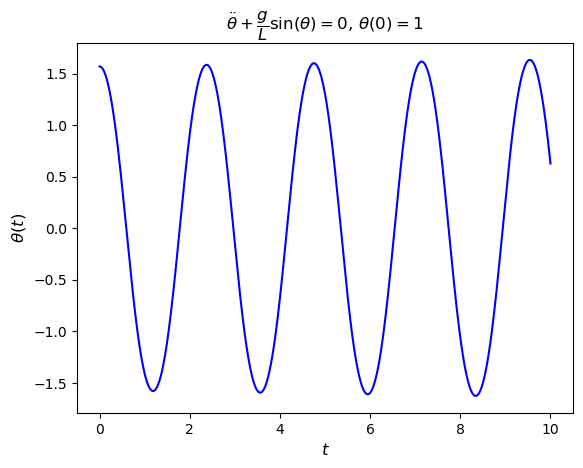

In [5]:
# Define ODE function
def pendulum(t, y):
    return np.array([y[1], -g / L * np.sin(y[0])])


# Define IVP parameters
tspan = [0, 10]
y0 = [np.pi / 2, 0]
h = 0.001
g, L = 9.81, 1

# Solve IVP
t, y = euler(pendulum, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b")
plt.xlabel("$t$", fontsize=12)
plt.ylabel("$\\theta(t)$", fontsize=12)
plt.title("$\\ddot{\\theta} + \\dfrac{g}{L}\sin(\\theta) = 0$, $\\theta(0) = 1$")
plt.show()


glue("ex1.2_plot", fig, display=False)

`````{exercise}
:label: ch1-ex3

The <a href="https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations" target="_blank">Lotka-Volterra equations</a> is a model of predator-prey  interactions

$$ \begin{align*}
    \frac{\mathrm{d}x}{\mathrm{d}t} &= ax - bxy, \\
    \frac{\mathrm{d}y}{\mathrm{d}t} &= -cy + dxy,
\end{align*} $$ 

where $x$ and $y$ are the population densities of the prey and predator species respectively, $a$ and $b$ are the parameters that govern the birth and death rate of the prey species, and $c$ and $d$ are parameters that govern the birth and death rates of the predator species.

(a) &emsp; In a given square kilometer the population of rabbits ($x$) and foxes ($y$) is known to be $x(0) = y(0) = 5$. Given the the birth and death rates is 0.1 and 0.02 for the rabbit population and 0.04 and 0.04 for the fox population, use the Lotka-Volterra to model the population of the two species over a time frame of $[0, 100]$. Produce a plot of the population of both species on the same set of axes.


````{dropdown} Solution
```{glue:figure} ex1.3a_plot
```
````

(b) &emsp; Repeat the calculations with the initial populations $x(0) = y(0) = 5$ and increasing by 5 each time until $x(0) = y(0) = 30$. Produce a plot of the fox population against the rabbit population for each solution on the same set of axes (known as a <a href="https://en.wikipedia.org/wiki/Phase_space" target="_blank">phase-space</a> plot). 


````{dropdown} Solution
```{glue:figure} ex1.3b_plot
```
````
`````

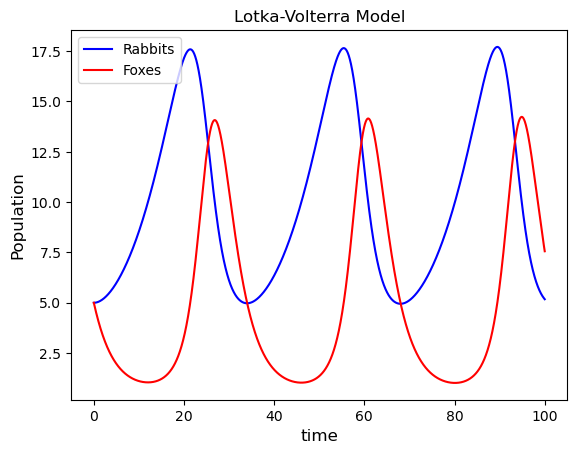

In [6]:
# Define Lotka-Volterra equations
def lotka_volterra(t, y):
    return np.array([a * y[0] - b * y[0] * y[1], -c * y[1] + d * y[0] * y[1]])


# Define the IVP
tspan = [0, 100]
y0 = [5, 5]
h = 0.01
a, b, c, d = 0.1, 0.02, 0.4, 0.04

# Solve the IVP
t, y = euler(lotka_volterra, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b", label="Rabbits")
plt.plot(t, y[:,1], "r", label="Foxes")
plt.legend()
plt.xlabel("time", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.title("Lotka-Volterra Model")
plt.show()


glue("ex1.3a_plot", fig, display=False)

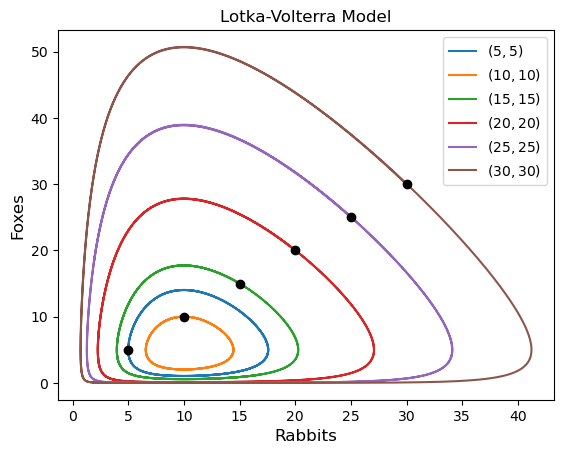

In [7]:
# Plot solution
fig, ax = plt.subplots()

y0 = np.array([5, 5])
h = 0.001
for i in range(6):
    t, y = euler(lotka_volterra, tspan, y0, h)
    plt.plot(y[:,0], y[:,1], label=f"$({y0[0]}, {y0[1]})$")
    plt.plot(y0[0], y0[1], 'ko')
    y0 += np.array([5, 5])
    
plt.legend()
plt.xlabel("Rabbits", fontsize=12)
plt.ylabel("Foxes", fontsize=12)
plt.title("Lotka-Volterra Model")
plt.show()

glue("ex1.3b_plot", fig, display=False)